# Projet 2 : Analyser des données de systèmes éducatifs
*Pierre-Eloi Ragetly*

Ce projet fait parti du parcours DataScientist.  

L'objectif principal est de réaliser une analyse exploratoire de données pour une compagnie fictive EdTech company appelée *Academy*. Cette compagnie, spécialisée dans la formation en ligne à destination des lycées et des étudiants en étude supérieure, cherche à se développer à l'international. Elle nous demande de lui trouver les meilleurs pays cibles, ne disposant pas encore de données pertinantes en interne elle propose d'utiliser les données de la banque mondiale.
https://datacatalog.worldbank.org/dataset/education-statistics

Notre première mission, sera de déterminer si ces données seront suffisantes pour mener à bien notre étude.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import analysis.dataload as ld
import analysis.datavisu as vs
import seaborn as sns

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'axes.titleweight': 'bold'})
sns.set(style='ticks')
current_palette = sns.color_palette('RdBu', 10)
sns.set_palette(current_palette)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Récupération-des-données" data-toc-modified-id="Récupération-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Récupération des données</a></span><ul class="toc-item"><li><span><a href="#Télécharger-les-données" data-toc-modified-id="Télécharger-les-données-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Télécharger les données</a></span></li><li><span><a href="#Découvrir-les-données" data-toc-modified-id="Découvrir-les-données-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Découvrir les données</a></span></li><li><span><a href="#Sélection-des-variables" data-toc-modified-id="Sélection-des-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Sélection des variables</a></span></li></ul></li><li><span><a href="#Explorer-les-données" data-toc-modified-id="Explorer-les-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Explorer les données</a></span><ul class="toc-item"><li><span><a href="#Examiner-la-stucture-des-données" data-toc-modified-id="Examiner-la-stucture-des-données-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Examiner la stucture des données</a></span></li><li><span><a href="#Visualisations-des-données" data-toc-modified-id="Visualisations-des-données-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualisations des données</a></span></li><li><span><a href="#Recherche-de-corrélations" data-toc-modified-id="Recherche-de-corrélations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Recherche de corrélations</a></span></li></ul></li><li><span><a href="#Préparer-les-données" data-toc-modified-id="Préparer-les-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Préparer les données</a></span><ul class="toc-item"><li><span><a href="#Nettoyer-les-données" data-toc-modified-id="Nettoyer-les-données-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Nettoyer les données</a></span></li><li><span><a href="#Normaliser-les-données" data-toc-modified-id="Normaliser-les-données-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Normaliser les données</a></span></li></ul></li><li><span><a href="#Création-d'un-modèle-permettant-de-trier-les-pays-en-fonction-de-leur-pertinance" data-toc-modified-id="Création-d'un-modèle-permettant-de-trier-les-pays-en-fonction-de-leur-pertinance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Création d'un modèle permettant de trier les pays en fonction de leur pertinance</a></span><ul class="toc-item"><li><span><a href="#Création-d'un-score" data-toc-modified-id="Création-d'un-score-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Création d'un score</a></span></li><li><span><a href="#Visualisation-des-10-pays-les-plus-pertinants" data-toc-modified-id="Visualisation-des-10-pays-les-plus-pertinants-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Visualisation des 10 pays les plus pertinants</a></span></li></ul></li></ul></div>

## Récupération des données

### Télécharger les données

On commence par télécharger les données du site de la banque mondiale. Pour cela nous utilisons une fonction spécifiquement créée dans ce but.

In [3]:
url = 'http://databank.worldbank.org/data/download/Edstats_csv.zip'
list_csv = ld.download_data(url)

The extracted files are:
EdStatsCountry-Series.csv
EdStatsCountry.csv
EdStatsData.csv
EdStatsFootNote.csv
EdStatsSeries.csv


6 fichiers en format csv ont été téléchargés. Les deux premiers donnent des infos sur les attributs disponibles, le troisième informe sur la source des données, le quatrième est celui qui contient toutes les données et qui va donc être à la base de notre analyse. Les deux derniers fournissent des données supplémentaires sur les pays. Pour notre analyse nous utiliserons les deux fichiers suivants :
- EdStatsData.csv
- EdStatsCountry.csv

Pour manipuler les données, nous utiliserons la librairies pandas de Python.

In [4]:
raw_data = ld.load_data(list_csv[2])
raw_country = ld.load_data(list_csv[1])

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


### Découvrir les données

Commençons par regarder ce que contiennent ces données, pour cela nous utiliserons la méthode `info()` de pandas qui permet d'avoir des infos génériques du type : nombre d'individus, nom des variables ou encore le nombre d'entrée non nulles pour chacune d'entre elles.

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
Country Name      886930 non-null object
Country Code      886930 non-null object
Indicator Name    886930 non-null object
Indicator Code    886930 non-null object
1970              72288 non-null float64
1971              35537 non-null float64
1972              35619 non-null float64
1973              35545 non-null float64
1974              35730 non-null float64
1975              87306 non-null float64
1976              37483 non-null float64
1977              37574 non-null float64
1978              37576 non-null float64
1979              36809 non-null float64
1980              89122 non-null float64
1981              38777 non-null float64
1982              37511 non-null float64
1983              38460 non-null float64
1984              38606 non-null float64
1985              90296 non-null float64
1986              39372 non-null float64
1987              38641 non-

On note plusieurs choses intéressantes. Premièrement sur les 70 variables (colonnes) disponibles, la plupart sont des années. Ces années s'échelonnent entre 1970 et 2100, avec un pas de 1 de 1970 à 2017 et un pas de 5 post 2020. Les années de 2020 à 2100 semblent être des projections. Ne sachant pas exactement sur quelles hypothèses elles ont été faites, il est préférable de ne pas les inclures dans notre analyse.

In [6]:
df = raw_data.iloc[:, :-18].copy()

Les lignes (au nombre de 886'930) semblent correspondre à un attribut donné (colonne *Indicator Name*) pour un pays donné. Regardons combien de pays et d'attributs différents sont disponibles.

In [7]:
# display the number of countries
n_countries = df['Country Code'].unique().size
print("There are {} different countries.".format(n_countries))

# display the number of indicators
n_ind = df['Indicator Code'].unique().size
print("There are {} different indicators.".format(n_ind))

There are 242 different countries.
There are 3665 different indicators.


La bonne nouvelle c'est que les données sont exhaustives, par contre 3665 attributs c'est beaucoup trop, il va donc falloir sélectionner les plus pertinents. De plus, la configuration actuelle des données n'est pas très pratique. En effet, on aimerait avoir non pas les années en colonnes mais les attributs sélectionnés et en ligne les pays. Les valeurs utilisées pour remplir cette table seront celles de l'année la plus récente si suffisamment de données sont disponibles pour cette dernière, dans le cas contraire nous prendrons l'année précédente.

### Sélection des variables

Comme dis plus haut il va falloir sélectonner les attributs que l'on va utiliser. Pour se faire, revenons à l'objectif de notre mission. Il s'agit d'aider une compagnie spécialisée dans la formation en ligne pour les lycéens et les étudiants. On va donc viser **une population jeune (15-25 ans) qui a accés à internet**. De plus, pour pouvoir différencier les pays il peut être intéressant de connaître le PIB/habitants ainsi qu'une mesure des inégalités de chaque pays. Le premier nous permettra d'avoir une vague idée de la capacité financière de la population, quant à la deuxième elle nous permettra de savoir si le diplôme a un réel impact sur la carière et les revenus futurs. Ce dernier point peut paraître étrange, mais une étude de la banque mondiale de **XX**, repris pour le projet 7 du parcours de Data Analyst d'Open Classrooms permet de constater que, plus le niveau d'inégalité est élevé, plus ce sont les revenus des parents et non le diplôme qui vont déterminer les revenus futurs de l'enfant. Ainsi, la volonté de réussir sont parcours scolaire sera beaucoup moins présent dans les pays inégalitaires que les pays égalitaires.

Parmi les milliers d'indicateurs disponibles dans les données de la banque mondiale, les suivants se rapprochent des attributs décris ci-dessus :
- GDP per Capita, PPP
- Gini coeffient of average years of schooling
- Internet access
- Population, 15-24, total

Nous ajouterons aussi les données de population totale qui permettrons de calculer la part des jeunes (15-24 ans) sur la population totale.

Pour finir, nous ajouterons à partir du jeu de données sur les pays les variables :
- Region
- Income group

La première pour voir si on observe de grosses variations d'une région à l'autre, mais aussi au sein d'une même région. La deuxième pour vérifier s'il ne serait pas plus pertinent de travailler par classe de revenus plutôt que par revenu directement.

Nous sélectionnerons ces attributs pour les trois dernières années disponibles (2015-2017) au cas ou trop peu de données seraient disponibles pour 2017 et 2016.

In [8]:
# get the first four features from the mains dataset
columns = df.columns.to_list()
columns = columns[: 4] + columns[-3:]
list_feat = ['NY.GDP.PCAP.PP.CD',
             'HH.DHS.YRS.15UP.GIN',
             'HH.MICS.YRS.15UP.GIN', #same feature that above but with another calculation way
             'IT.NET.USER.P2',
             'SP.POP.TOTL',
             'SP.POP.1524.TO.UN']
mask = df['Indicator Code'].isin(list_feat)
df = df[columns][mask]

# get the last two features from the country dataset
columns = ['Country Code', 'Region', 'Income Group']
data = pd.merge(df, raw_country[columns].dropna(), how='inner', on='Country Code', copy=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1283
Data columns (total 9 columns):
Country Name      1284 non-null object
Country Code      1284 non-null object
Indicator Name    1284 non-null object
Indicator Code    1284 non-null object
2015              781 non-null float64
2016              590 non-null float64
2017              0 non-null float64
Region            1284 non-null object
Income Group      1284 non-null object
dtypes: float64(3), object(6)
memory usage: 100.3+ KB


On note que l'année 2017 possède aucune valeur non nulle, on ne va donc pas garder cette année. Pour choisir entre 2015 et 2016 regardons quels sont les indicateurs manquants.

In [9]:
data.drop(['2015', '2017'], axis=1).dropna()['Indicator Code'].value_counts()

SP.POP.TOTL          209
IT.NET.USER.P2       200
NY.GDP.PCAP.PP.CD    181
Name: Indicator Code, dtype: int64

In [10]:
data.drop(['2016', '2017'], axis=1).dropna()['Indicator Code'].value_counts()

SP.POP.TOTL            209
IT.NET.USER.P2         201
NY.GDP.PCAP.PP.CD      184
SP.POP.1524.TO.UN      181
HH.DHS.YRS.15UP.GIN      6
Name: Indicator Code, dtype: int64

N'ayant aucune donnée de population pour les 15-24 ans en 2016, il est préférable de continuer avec les données de 2015. De plus, on remarque que très peu de données sont disponibles pour le coefficient de Gini. On va donc devoir faire sans.

In [11]:
list_feat = ['NY.GDP.PCAP.PP.CD',
             'IT.NET.USER.P2',
             'SP.POP.TOTL',
             'SP.POP.1524.TO.UN']
mask = data['Indicator Code'].isin(list_feat)
data = data[mask].drop(['2016', '2017'], axis=1)

Pour finir, nous allons changer l'organisation de notre table afin d'avoir les indicators comme variable (en colonne)

In [12]:
df = pd.pivot_table(data, values='2015', index='Country Code', columns='Indicator Name')
data = (pd.merge(data.drop(['Indicator Name', 'Indicator Code', '2015'], axis=1).drop_duplicates(),
                df, on='Country Code', copy=False)
          .set_index('Country Name'))

## Explorer les données

### Examiner la stucture des données

Commençons par utiliser la méthode `info()` pour obtenir une description des données sélectionnées.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, Afghanistan to Zimbabwe
Data columns (total 7 columns):
Country Code                                     210 non-null object
Region                                           210 non-null object
Income Group                                     210 non-null object
GDP per capita, PPP (current international $)    184 non-null float64
Internet users (per 100 people)                  201 non-null float64
Population, ages 15-24, total                    181 non-null float64
Population, total                                209 non-null float64
dtypes: float64(4), object(3)
memory usage: 13.1+ KB


On constate que notre jeu de données (après selection de variable) comporte **210 pays et 7 variables**.

La première variable est le code ISO (code à 3 lettres) de chaque pays, nous l'avons gardée afin de sélectionner les pays plus facilement. Elle n'a en revanche aucune utilité pour le classement des pays. Les deux autre variables *Region* et *Income Group* sont des variables qualitatives, elles ne peuvent prendre qu'un nombre fini de valeurs différentes qu'on appelle **modalités**. Pour obtnir la liste de ces modalités ainsi que leur effectif, on peut utiliser la méthode `value_counts()`

In [14]:
print("Modalités de la variable 'Region' : \n {}".format(data["Region"].value_counts()))

Modalités de la variable 'Region' : 
 Europe & Central Asia         57
Sub-Saharan Africa            47
Latin America & Caribbean     38
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64


In [15]:
print("Modalités de la variable 'Income Group' : \n {}".format(data["Income Group"].value_counts()))

Modalités de la variable 'Income Group' : 
 Upper middle income     55
Lower middle income     49
High income: nonOECD    41
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64


Les quatre dernières variables sont des variables quantitatives, la méthode `describe()` permet d'avoir un descriptif des variables numériques.

In [16]:
data.describe()

,"GDP per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total","Population, total"
count,184.000000,201.000000,1.810000e+02,2.090000e+02
mean,19640.344442,48.785759,6.654995e+06,3.499868e+07
std,21749.930323,28.542027,2.404044e+07,1.357038e+08
min,668.337622,1.083733,1.445500e+04,1.100100e+04
25%,3900.523123,21.725834,4.897540e+05,1.160985e+06
50%,11988.997278,50.300000,1.331040e+06,6.639119e+06
75%,26730.951388,73.098700,4.945440e+06,2.378934e+07
max,127764.462337,98.323610,2.441202e+08,1.371220e+09


La première ligne compte le nombre de valeurs renseignées, ainsi on peut connaître le nombre de données manquantes pour chaque variable :
- 26 pour le GDP
- 9 pour *internet users*
- 29 pour la population des 15-24 ans
- 1 pour la population totale

Nous verrons par la suite comment traiter ces variable manquantes

De plus, on constate que les variables possèdent des dipersion (attribut std) complètement différentes &ndash; allant jusqu'à 7 ordres de grandeur entre la plus dispersée et la moins dispersée. Il faudra donc les normalise afin d'éviter qu'une des variables écrase les autres.

Une manière rapide de visualiser ces dispersion est de tracer les histogrammes.

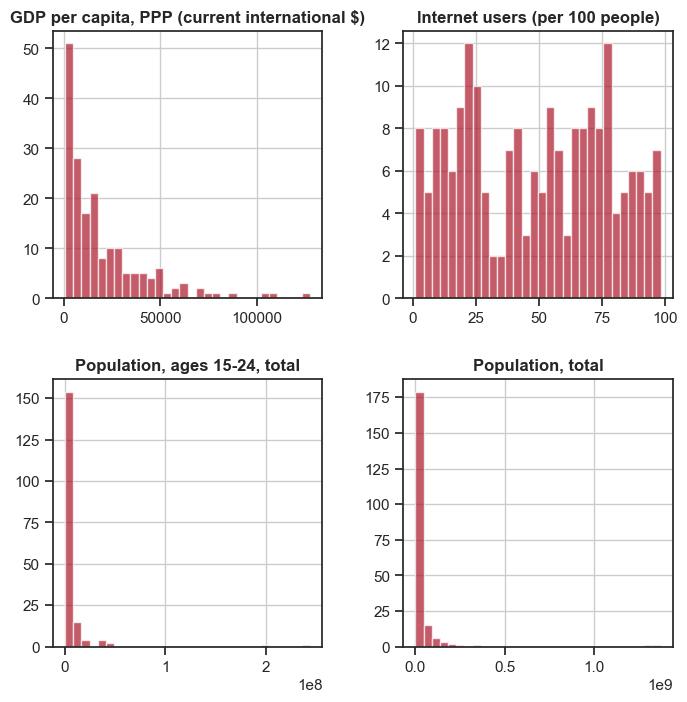

In [17]:
data.hist(bins=30, figsize=(8, 8), alpha=0.7)
plt.show()

On peut faire plusieurs remarques :
- Ces variables ont des échelles très différentes (ce qu'on avait déja constaté avec la méthode `describe()`). Ce qui confirme la nécessité de normaliser les données.
- La majorité des histogrammes sont fortement dissymétriques, nous essaierons par la suite de transformer ces données afin d'obtenir une distribution plus proche d'une gaussienne.
- La distribution de la variable *internet users* est bimodale.

### Visualisations des données

Étant donné le nombre restreint de données, il serait pratique, pour commencer notre exploration des données, par toutes les tracer sur un même graphique. Cela nous permettrait :
- d'avoir une bonne vision d'ensemble (et voir si certains pays se détachent)
- voir si certaines corrélations existent entre les variables

Au vu des données, le graphique le plus adapté semble être le graphique à bulle. On pourrait tracer le nombre d'utilisateurs internet en fonction du nombre de jeune entre 15-24 ans. On utilisera des cercles pour représenter les points, dont le diamètre seront proportionnels à la population et la couleur fonction des valeurs de PIB.  
La variable **internet users** représente pour 100 personnes le nombre ayant accès à internet, il s'agit donc grosso modo d'un pourcentage. Il serait pertinent d'avoir un format similaire pour la population des 15-24 ans. Pour cela on peut calculer le ratio de de la population des 15-24 sur la population totale, puis multiplier le ratio par 100.
$$\text{15-24, ratio} = \frac{\text{Population, 15-24}}{\text{Population, total}} \times 100$$ 

In [18]:
# add 15-24 population ratio 
data['Population, ages 15-24, ratio'] = data.iloc[:, -2]/data.iloc[:, -1] * 100

In [19]:
data.head()

,Country Code,Region,Income Group,"GDP per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total","Population, total","Population, ages 15-24, ratio"
Country Name,,,,,,,,
Afghanistan,AFG,South Asia,Low income,1864.973641,8.260000,7252785.0,33736494.0,21.498336
Albania,ALB,Europe & Central Asia,Upper middle income,11449.094589,63.252933,556269.0,2880703.0,19.310182
Algeria,DZA,Middle East & North Africa,Upper middle income,14643.343064,38.200000,6467818.0,39871528.0,16.221646
American Samoa,ASM,East Asia & Pacific,Upper middle income,NaN,NaN,NaN,55537.0,NaN
Andorra,AND,Europe & Central Asia,High income: nonOECD,NaN,96.910000,NaN,78014.0,NaN


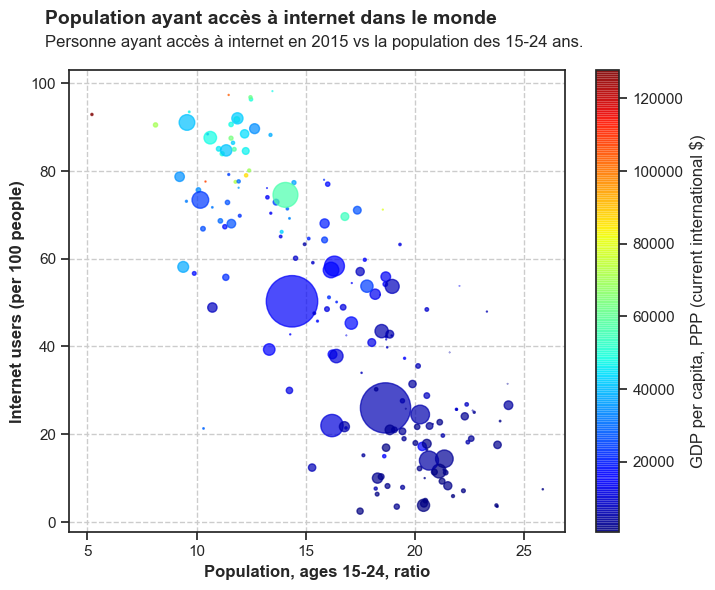

In [20]:
plot = data.plot(kind='scatter', x=-1, y=-4, alpha=0.7,
                 s=data.iloc[:, -2]/1000000, figsize=(8, 6),
                 c=3, cmap=plt.get_cmap('jet'), colorbar=True)
# Personnalize the plot
title = "Population ayant accès à internet dans le monde"
subtitle = "Personne ayant accès à internet en 2015 vs la population des 15-24 ans."
file = "bubble_plot"
vs.nice_plot(plot, legend=False, title=title, subtitle=subtitle, file=file)

Les bulles semblent être alignées sur une droite, ce qui indique l'existence d'une corrélation linéaire entre le nombre d'utilisateurs d'internet et la population des 15-24 ans. On remarque aussi que plus la plus population d'un pays est jeune plus le PIB/hab est faible, il y aurait donc la aussi une corrélation entre les variables. En revanche, il ne semble y avoir aucune corrélation entre la taille des bulles (ie. la population totale) et les autres variables.

### Recherche de corrélations

Un moyen facile de vérifier les corrélations entre les couples de variables est de calculer la matrice des corrélations.

In [21]:
data.corr()

,"GDP per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total","Population, total","Population, ages 15-24, ratio"
"GDP per capita, PPP (current international $)",1.000000,0.760638,-0.078244,-0.048966,-0.712120
Internet users (per 100 people),0.760638,1.000000,-0.071818,-0.055935,-0.773213
"Population, ages 15-24, total",-0.078244,-0.071818,1.000000,0.989296,0.030698
"Population, total",-0.048966,-0.055935,0.989296,1.000000,-0.012998
"Population, ages 15-24, ratio",-0.712120,-0.773213,0.030698,-0.012998,1.000000


Cette matrice nous donne les coefficients de corrélations (appelé également r de Pearson) entre les variables. Ces coefficients sont compris entre -1 (totalement anti-corrélé) et 1 (totalement corrélé). Un coefficient proche de 0 signifie l'absence de corrélation **linéaire**. Ainsi un r proche de 0 ne signifie pas nécessairement l'absence de corrélation. C'est pourquoi, on aime en plus de la matrice des corrélations tracer chaque couple de variable, pour celà on utilise la méthode `scatter_matrix()`.

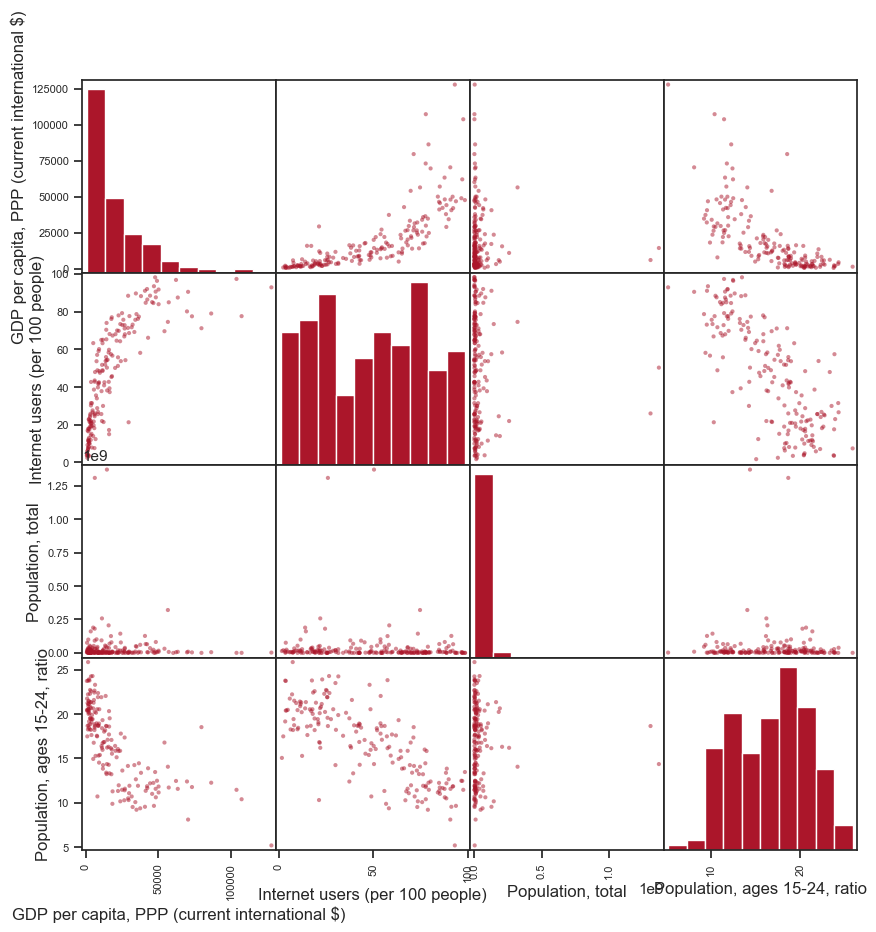

In [22]:
attributes = data.columns.to_list()
attributes = attributes[3: 5] + attributes [6:]
pd.plotting.scatter_matrix(data[attributes], figsize=(10, 10))
plt.show()

On constate que la population est bien complètement décorélée des autres variables. En revanche on peut noter que le PIB semble plutôt avoir une relation exponentielle avec les utilisateurs internet et la population des 15-24 ans. Prenons son logarithme et essayons de voir si on obtient une meilleure corrélation.

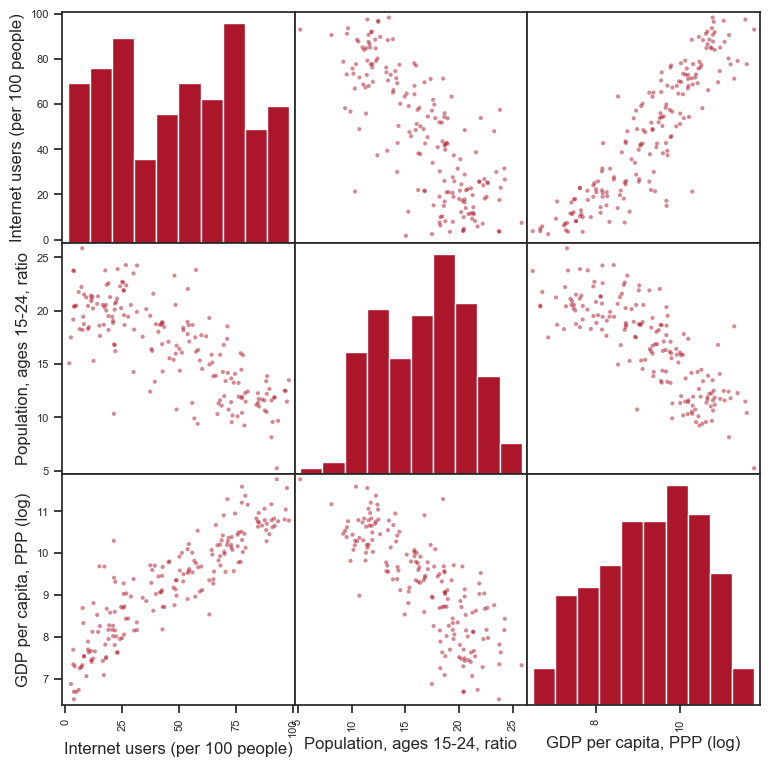

,Internet users (per 100 people),"Population, ages 15-24, ratio","GDP per capita, PPP (log)"
Internet users (per 100 people),1.000000,-0.773213,0.898383
"Population, ages 15-24, ratio",-0.773213,1.000000,-0.800540
"GDP per capita, PPP (log)",0.898383,-0.800540,1.000000


In [23]:
data["GDP per capita, PPP (log)"] = np.log(data.iloc[:, 3].values)
attributes = data.columns.to_list()
attributes = attributes[4: 5] + attributes [7:]
pd.plotting.scatter_matrix(data[attributes], figsize=(9, 9))
plt.show()
data[attributes].corr()

On constate que le passage au logarithme a permis de linéariser la corrélation avec les autres variables. On obtient ainsi une augmentation significative des coefficients de Pearson.

Nous en avons fini avec la phase d'exploration des données, nous allons pouvoir commencer la préparation de ces dernières avec notamment le traitement des valeurs manquantes.

## Préparer les données

### Nettoyer les données

In [24]:
mask = data["Population, total"].isnull()
data[mask]

,Country Code,Region,Income Group,"GDP per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total","Population, total","Population, ages 15-24, ratio","GDP per capita, PPP (log)"
Country Name,,,,,,,,,
Eritrea,ERI,Sub-Saharan Africa,Low income,NaN,1.083733,1168307.0,NaN,NaN,NaN


In [25]:
mask = data.iloc[:, 4].isnull()
data[mask]

,Country Code,Region,Income Group,"GDP per capita, PPP (current international $)",Internet users (per 100 people),"Population, ages 15-24, total","Population, total","Population, ages 15-24, ratio","GDP per capita, PPP (log)"
Country Name,,,,,,,,,
American Samoa,ASM,East Asia & Pacific,Upper middle income,NaN,NaN,NaN,55537.0,NaN,NaN
Channel Islands,CHI,Europe & Central Asia,High income: nonOECD,NaN,NaN,NaN,163758.0,NaN,NaN
Isle of Man,IMN,Europe & Central Asia,High income: nonOECD,NaN,NaN,NaN,83167.0,NaN,NaN
"Korea, Dem. People’s Rep.",PRK,East Asia & Pacific,Low income,NaN,NaN,4023348.0,25243917.0,15.937891,NaN
Kosovo,XKX,Europe & Central Asia,Lower middle income,9706.023908,NaN,NaN,1801800.0,NaN,9.180502
Northern Mariana Islands,MNP,East Asia & Pacific,High income: nonOECD,NaN,NaN,NaN,54816.0,NaN,NaN
Palau,PLW,East Asia & Pacific,Upper middle income,15985.205667,NaN,NaN,21288.0,NaN,9.679419
San Marino,SMR,Europe & Central Asia,High income: nonOECD,60145.460932,NaN,NaN,32960.0,NaN,11.004521
Turks and Caicos Islands,TCA,Latin America & Caribbean,High income: nonOECD,NaN,NaN,NaN,34339.0,NaN,NaN


### Normaliser les données

## Création d'un modèle permettant de trier les pays en fonction de leur pertinance

### Création d'un score

### Visualisation des 10 pays les plus pertinants